In [1]:
#Importing necessary libraries

import pandas as pd  # For data handling
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced data visualization
from sklearn.model_selection import train_test_split  # For splitting dataset
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.ensemble import RandomForestClassifier  # ML model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Model evaluation

In [2]:
#loading the dataset

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Define column names since the dataset does not have headers
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Load dataset into a Pandas DataFrame
df = pd.read_csv(url, names=column_names)


In [3]:
#display dataset few rows

print(df.head())


   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [4]:
#checking null values

print(df.isnull().sum())


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


In [5]:
#coverting categorical data into numerical data
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])


In [6]:
#spliting into training and testing data
X = df.drop('class', axis=1)  # Features
y = df['class']  # Target variable (class)

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [7]:
#feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
#train the classification model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [9]:
#make prediction
y_pred = model.predict(X_test)


Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



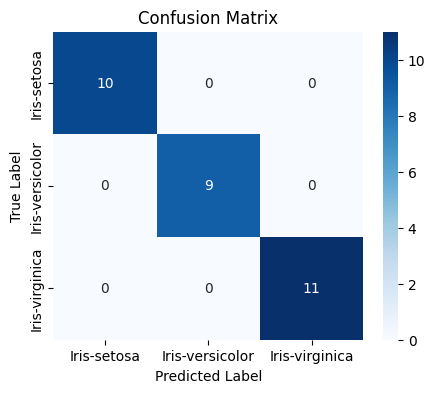

In [10]:
#evaluate

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d",
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
